<h1>HEART FAILURE PREDICTION USING 
ARTIFICIAL NEURAL NETWORK</h1>

<h2>Introduction</h2>
<p>The proposed system is the prediction of Heart failure using Artificial Neural 
Network (ANN). The objective of this project is to forecast the risk factors causing Heart failure.</p>

<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:150%"><b> Table of contents </b></h1>

    
1. [Importing libraries](#Libraries)
2. [Loading data](#Data)
3. [Statistical summaries](#Statistics)
4. [Data Cleaning](#DataCleaning)
5. [Exploratory Data Analysis](#EDA)
6. [Feature Engineering/Data Normalization](#Feature)
7. [Model Building](#Modelling)
    

<a name="Libraries"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>1. Importing libraries</b>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a name="Data"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>2. Loading data</b>

In [2]:
dataset = pd.read_csv(r'C:\Users\ADMIN\Documents\archive\heart.csv')
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
dataset.tail()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1
917,38,M,NAP,138,175,0,Normal,173,N,0.0,Up,0


<a name="Statistics"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>3. Statistical summaries</b>

In [4]:
# Identifying the datatype for every Variable
dataset.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [5]:
dataset.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [6]:
dataset.shape

(918, 12)

There are a regular data quantity to train model.

<a name="DataCleaning"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>4. Data Cleaning</b>

In [7]:
dataset.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

Dataset do not have missing data, which is good.

In [8]:
dataset['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

There are two classes well balanced.

<a name="EDA"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>5. Exploratory Data Analysis</b>
<h3>1. To check distribution for all the variables in the data<h3>

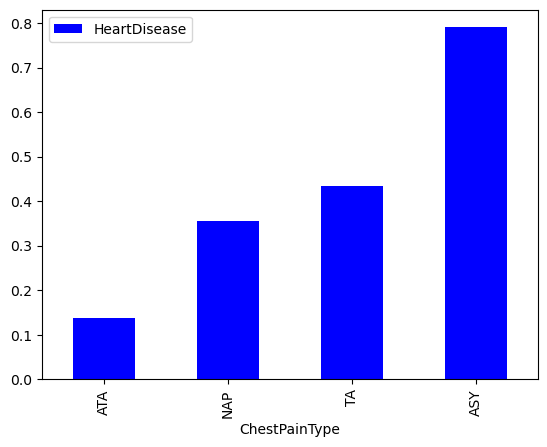

In [9]:
dic = dataset[['ChestPainType', 'HeartDisease']].groupby('ChestPainType').mean().sort_values(by = 'HeartDisease')
dic.plot(kind = 'bar', color = 'blue')
plt.show()

The most frequent chest pain in heart diseases seems to be asymptomatic (`ASY`).

Text(0.5, 0.98, 'Ages distribution related to Heart Disease')

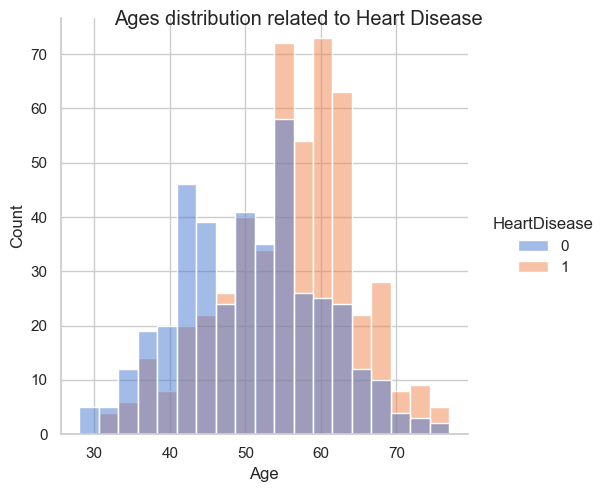

In [10]:
sns.set_theme(style = 'whitegrid', palette = 'muted')
ax = sns.displot(
    x = 'Age',
    hue = 'HeartDisease',
    data = dataset
)
ax.fig.suptitle('Ages distribution related to Heart Disease')

The histogram shows a **strong relationship between age and heart disease**, which is more frequent in older individuals. This relationship is more visible in boxplot:

Text(0.5, 1.0, 'Age related to Heart Disease')

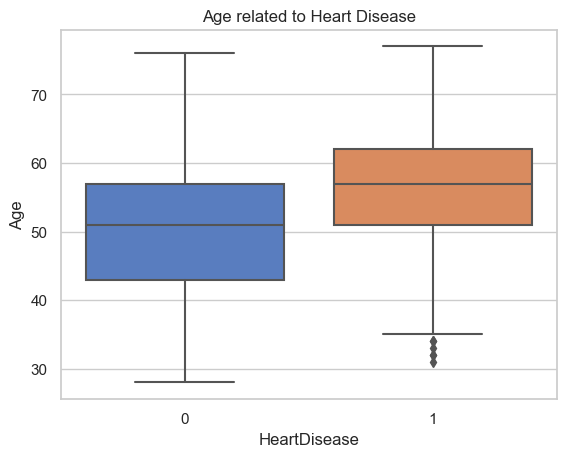

In [11]:
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'Age'
)
ax.set_title('Age related to Heart Disease')

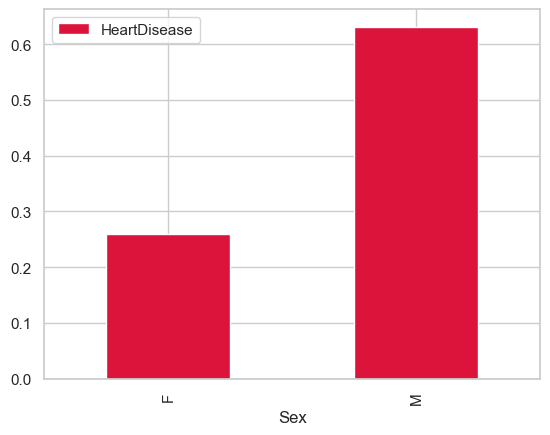

In [12]:
dic = dataset[['HeartDisease', 'Sex']].groupby('Sex').mean()
dic.plot(kind = 'bar', color = 'crimson')
plt.show()

In [13]:
sex_totals = dataset['Sex'].value_counts()
heart_disease_totals = dataset.query('HeartDisease == 1')['Sex'].value_counts()
print('Heart disease rate on males: %.2f' % ((heart_disease_totals['M'] / sex_totals['M']) * 100))
print('Heart disease rate on females: %.2f' % ((heart_disease_totals['F'] / sex_totals['F']) * 100))

Heart disease rate on males: 63.17
Heart disease rate on females: 25.91


Data indicates that **males are more susceptible to heart diseases** than females. **However, that is a great difference between the total of males and females on dataset.**

Text(0.5, 1.0, 'Cholesterol related to Heart Disease')

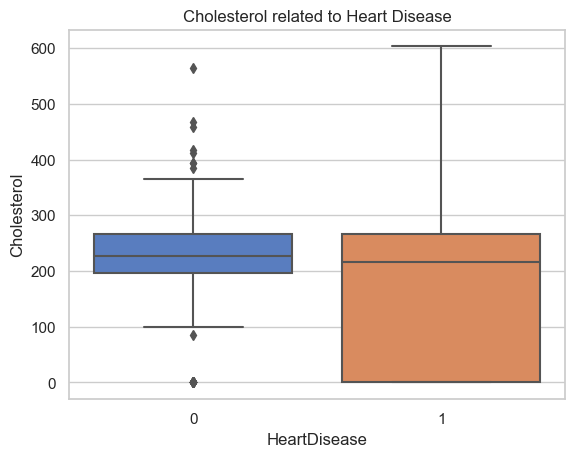

In [14]:
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'Cholesterol'
)
ax.set_title('Cholesterol related to Heart Disease')

Peharps there are many outliers candidates, there are not great difference between classes mean.

Text(0.5, 1.0, 'Resting Blood Pressure (mmHg) related to Heart Diseases')

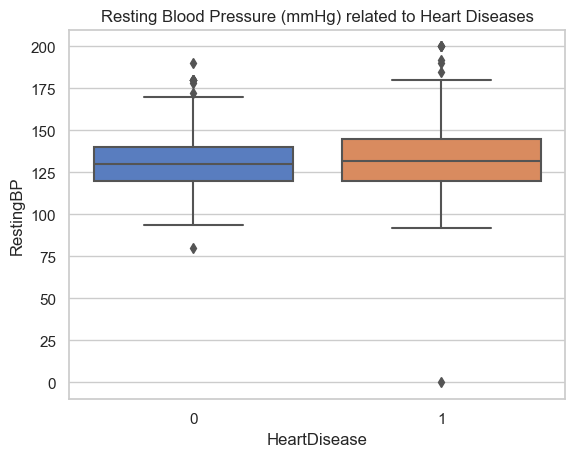

In [15]:
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'RestingBP'
)
ax.set_title('Resting Blood Pressure (mmHg) related to Heart Diseases')

There is a outlier with blood pressure equal `0` that is probably a missing data. I'll removing it from visualization:

Text(0.5, 1.0, 'Resting Blood Pressure (mmHg) related to Heart Diseases')

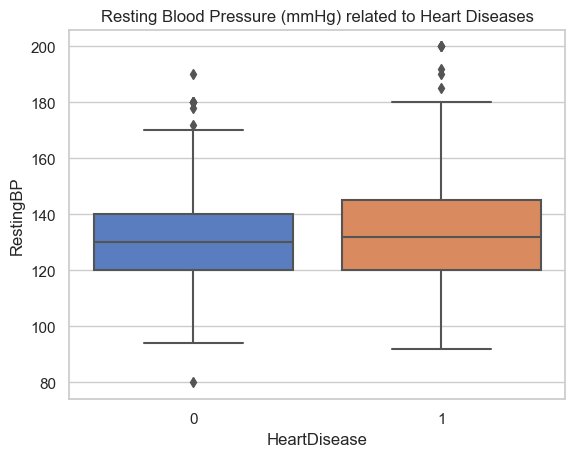

In [16]:
ax = sns.boxplot(
    data = dataset.query('RestingBP > 0'),
    x = 'HeartDisease',
    y = 'RestingBP'
)
ax.set_title('Resting Blood Pressure (mmHg) related to Heart Diseases')

Despite outliers, there is little difference between resting blood pressure between classes.

Text(0.5, 1.0, 'Maximun Heart Rate related to Heart Diseases')

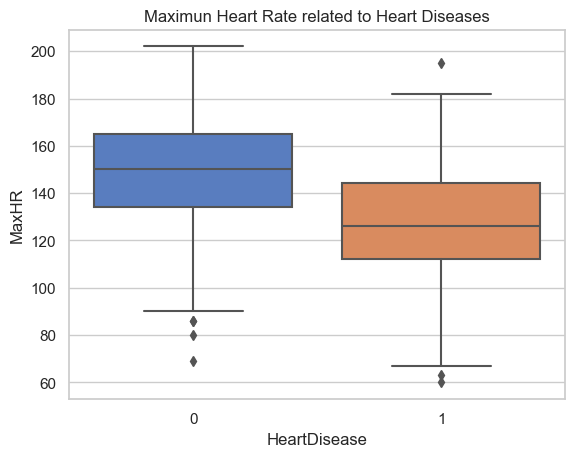

In [17]:
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'MaxHR'
)
ax.set_title('Maximun Heart Rate related to Heart Diseases')

There is a great difference on maximun heart rate mean between classes.

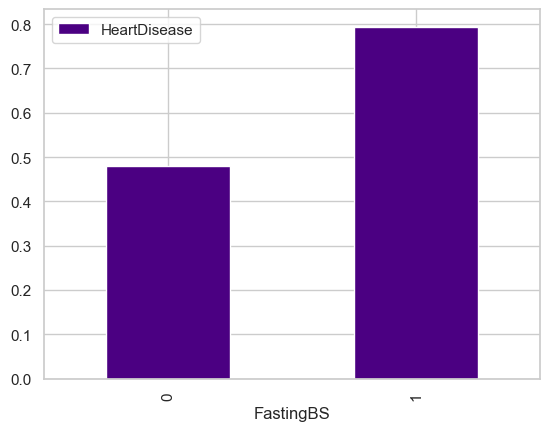

In [18]:
dic = dataset[['FastingBS', 'HeartDisease']].groupby('FastingBS').mean().sort_values(by = 'HeartDisease')
dic.plot(kind = 'bar', color = 'indigo')
plt.show()

Text(0.5, 0.98, 'Fasting Blood Sugar (> 120 mg/dl)')

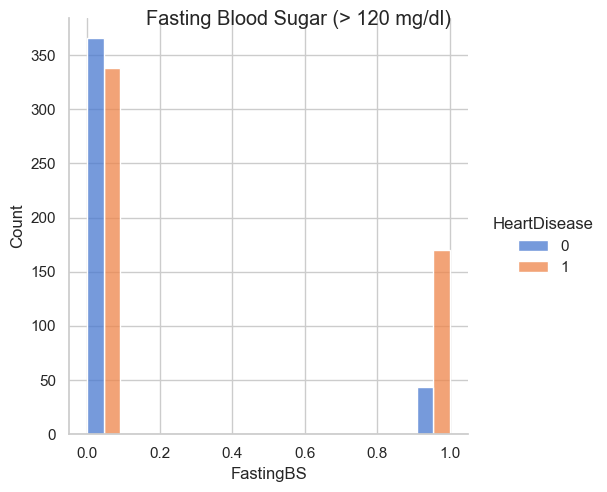

In [19]:
ax = sns.displot(
    data = dataset,
    x = 'FastingBS',
    hue = 'HeartDisease',
    multiple = 'dodge'
)
ax.fig.suptitle('Fasting Blood Sugar (> 120 mg/dl)')

Fasting blood sugar over 120 mg/dl seems to be more frequent on patients with heart diseases.

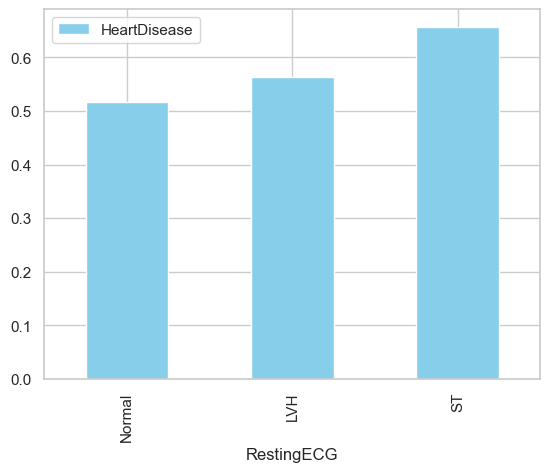

In [20]:
dic = dataset[['RestingECG', 'HeartDisease']].groupby('RestingECG').mean().sort_values(by = 'HeartDisease')
dic.plot(kind = 'bar', color = 'skyblue')
plt.show()

Text(0.5, 0.98, 'Resting Eletrocardiogram Result related to Heart Diseases')

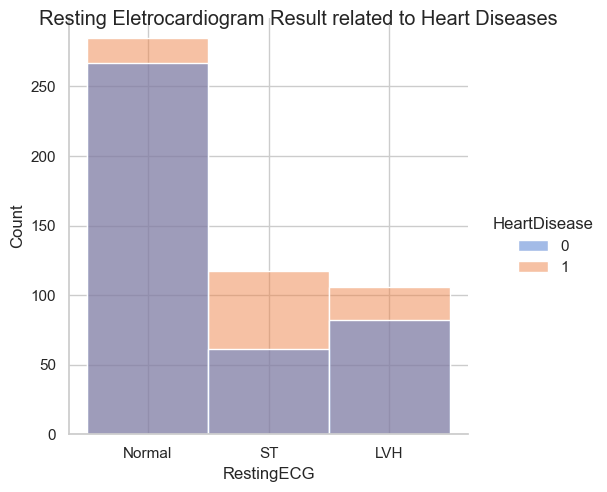

In [21]:
ax = sns.displot(
    data = dataset,
    x = 'RestingECG',
    hue = 'HeartDisease'
)
ax.fig.suptitle('Resting Eletrocardiogram Result related to Heart Diseases')

Text(0.5, 0.98, 'Exercise-induced Angina related to Heart Diseases')

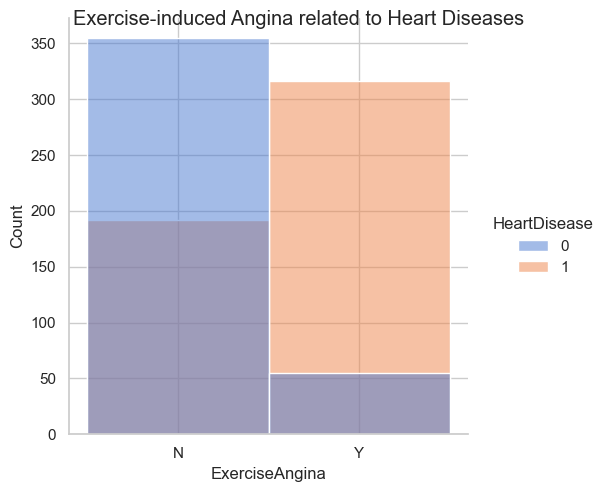

In [22]:
ax = sns.displot(
    data = dataset,
    x = 'ExerciseAngina',
    hue = 'HeartDisease'
)
ax.fig.suptitle('Exercise-induced Angina related to Heart Diseases')

The exercise-induced angina presence seems to be more related to heart diseases.

Text(0.5, 1.0, 'Old Peak related to Heart Diseases')

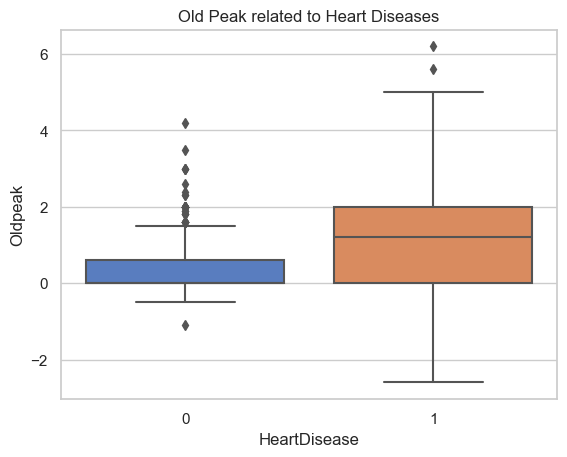

In [23]:
ax = sns.boxplot(
    data = dataset,
    x = 'HeartDisease',
    y = 'Oldpeak'
)
ax.set_title('Old Peak related to Heart Diseases')

Oldpeak are strong related to heart diseases development.

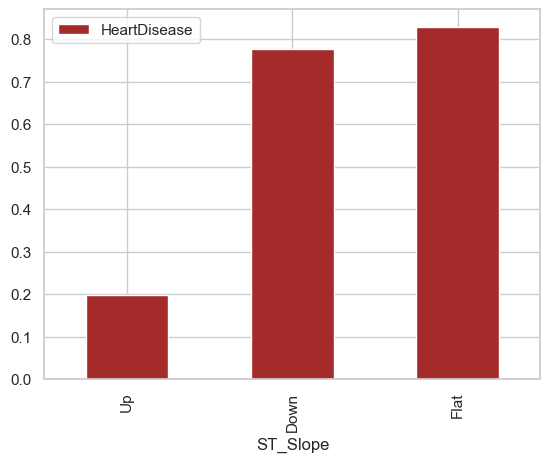

In [24]:
dic = dataset[['ST_Slope', 'HeartDisease']].groupby('ST_Slope').mean().sort_values(by = 'HeartDisease')
dic.plot(kind = 'bar', color = 'brown')
plt.show()

Text(0.5, 0.98, 'Slope of the peak exercise related to Heart Diseases')

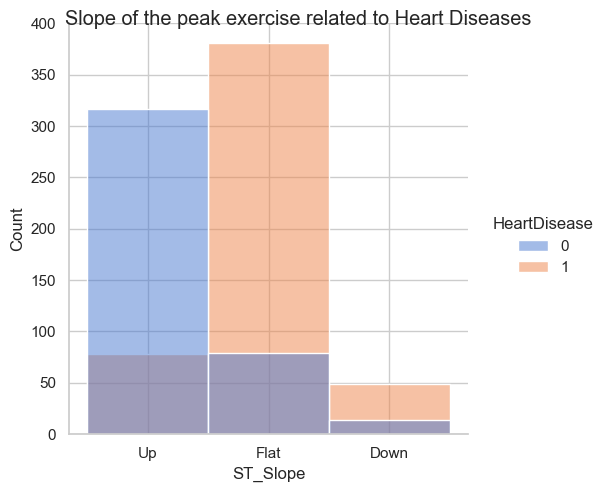

In [25]:
ax = sns.displot(
    data = dataset,
    x = 'ST_Slope',
    hue = 'HeartDisease'
)
ax.fig.suptitle('Slope of the peak exercise related to Heart Diseases')

Patients with `ST_Slope` values equals `Flat` or `Down` seems to be more susceptible to heart diseases.

<a name="Feature"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>6. Feature Engineering / Data Normalization</b>

## Fixing Outliers

In [66]:
def Fix_outliers(data, feature, method, upper = None, lower = None, impute = None):
    """
Function for fixing outliers using various methods, It takes the dataframe, columns,method for fixing, upper percentile
value none by default,lower percentile value, none by default and impute none by default as parameters. 

There are three methods for fixing in this function :
Imputation = Using another constant value to replace the outlier
Capping = Replacing outliers with the upper and lower percentile values
Log_transform = Getting the logrithm values of the column values and using it to transform the values
    """
    if method.lower() == 'imputation': #Checking condition for imputation
        Q1 = data[feature].quantile(lower) # Storing value for upper limit
        Q3 = data[feature].quantile(upper) # Storing values for lower limit
        print(data[feature].skew()) # Printing the skewness of the feature
        data[feature] = np.where(data[feature] < Q1, impute, data[feature] ) #Replace outliers with an imputted value and assign it to the feature,lower limit
        data[feature] = np.where(data[feature] > Q3, impute, data[feature] )# Replace outlierswith an imputted and assign it to feature, upper limit
        print(df[feature].skew())# Printing the skewness of the feature afterwards
        return data[feature] # Return the fixed feature
    elif method.lower() == 'capping': # Checking condition for capping
        Q1 = data[feature].quantile(lower) #Assign value for lower limit
        Q3 = data[feature].quantile(upper) # Assign value for upper limit
        print(data[feature].skew()) # Print the skewness of the feature
        data[feature] = np.where(data[feature] < Q1, Q1, data[feature] ) #Replace outliers with the lower limit value and assign it to the feature
        data[feature] = np.where(data[feature] > Q3, Q3, data[feature] ) # Replace outliers with the upper limit value and assign it to the feature
        print(data[feature].skew()) # Print the skewness of the feature
        return data[feature] #Return the fixed feature
    elif method.lower() == 'log_transform': # Checking condition for log_transform
        print(data[feature].skew()) #Print skewness of the feature
        data[feature] = np.log(data[feature]) + 1 # Performing the log transformation
        print(data[feature].skew()) # print the skewness after fixing
        return data[feature] # Return the feature

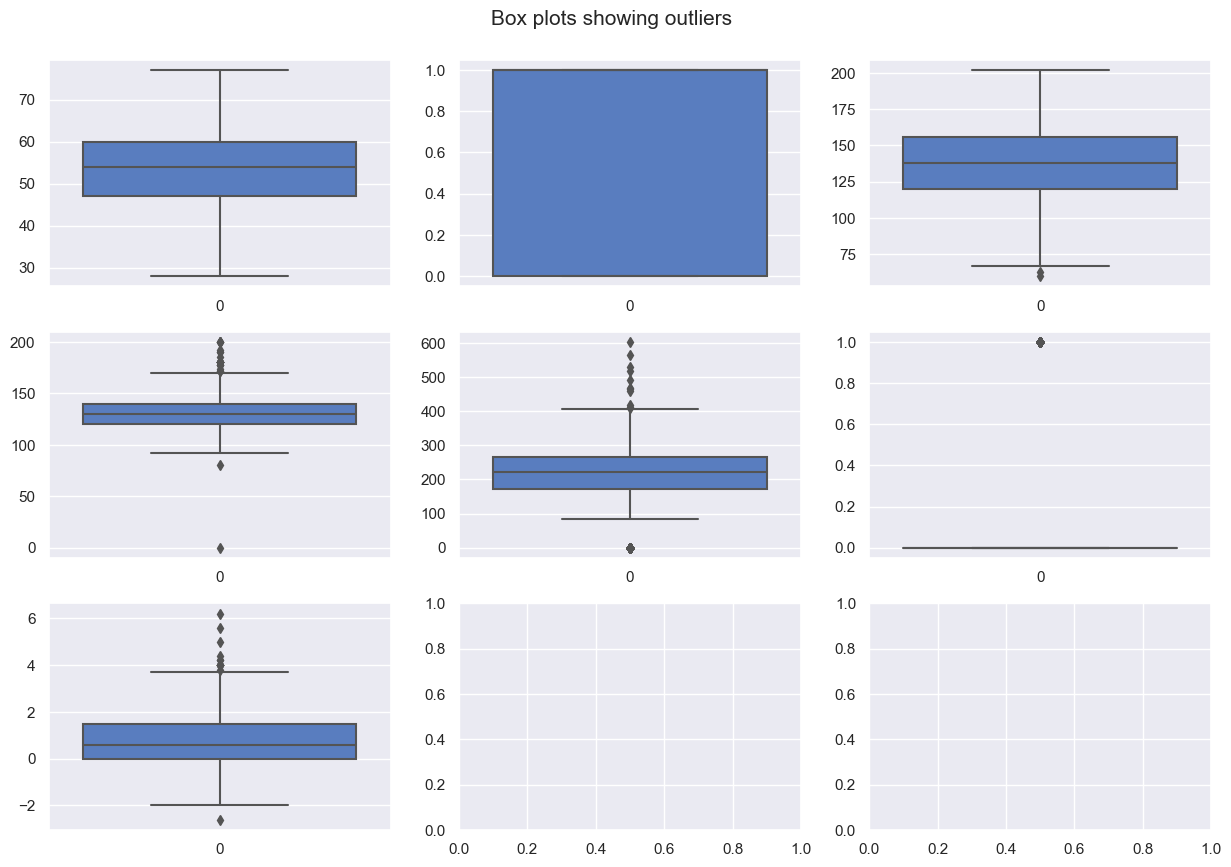

In [64]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), dataset, ['Age',	'HeartDisease',	'MaxHR',	'RestingBP',	'Cholesterol',	'FastingBS',	'Oldpeak']):
  sns.boxplot(dataset[name], ax = ax)

In [67]:
dataset['MaxHR'] = Fix_outliers(dataset, 'MaxHR', 'capping', 0.95, 0.05)

dataset['RestingBP'] = Fix_outliers(dataset, 'RestingBP', 'capping', 0.95, 0.05)

dataset['Cholesterol'] = Fix_outliers(dataset, 'Cholesterol', 'capping', 0.95, 0.05)

dataset['FastingBS'] = Fix_outliers(dataset, 'FastingBS', 'capping', 0.95, 0.05)

dataset['Oldpeak'] = Fix_outliers(dataset, 'Oldpeak', 'capping', 0.95, 0.05)

-0.14435941846180994
-0.008918888358171737
0.1798393100516288
0.21896396088877224
-0.6100864307268192
-0.9521806792097705
1.2644841750727027
1.2644841750727027
1.0228720218107528
0.7595629567027858


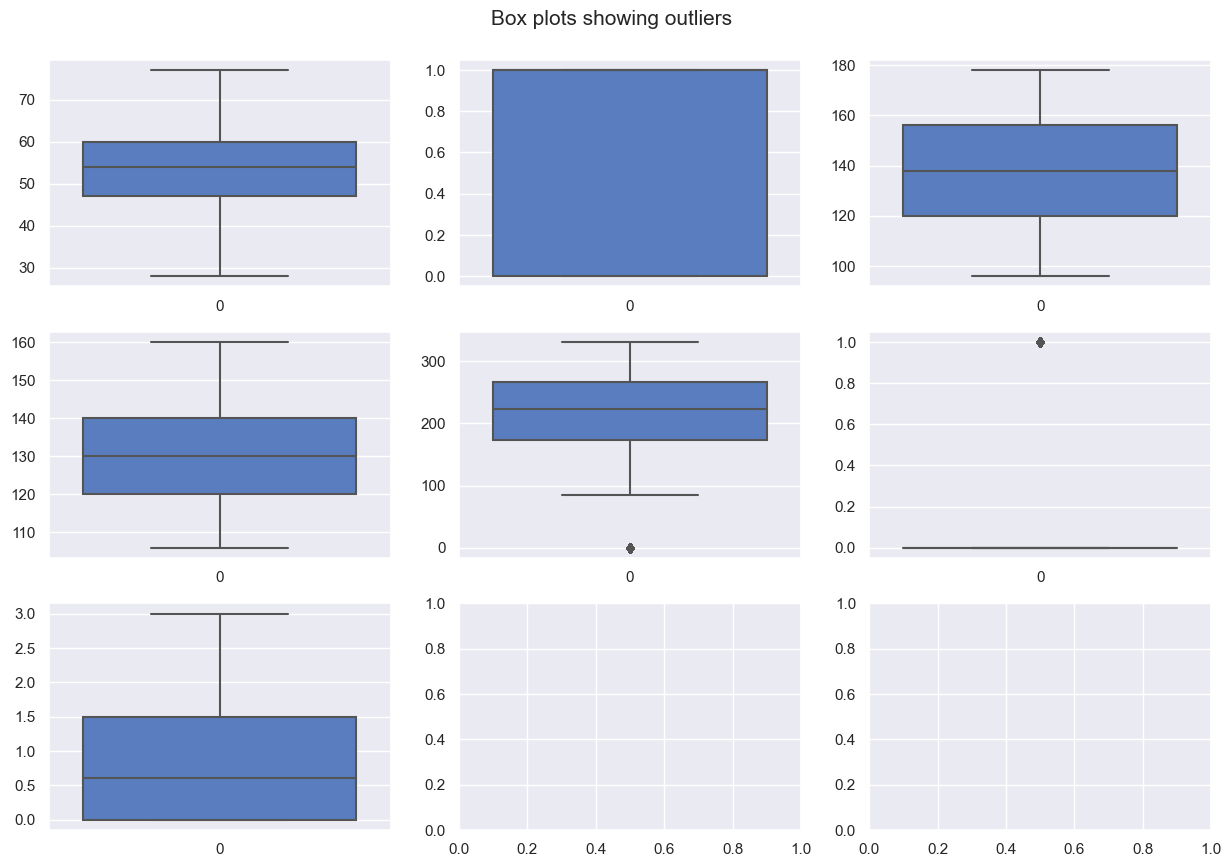

In [68]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), dataset, ['Age',	'HeartDisease',	'MaxHR',	'RestingBP',	'Cholesterol',	'FastingBS',	'Oldpeak']):
  sns.boxplot(dataset[name], ax = ax)

In [69]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    float64
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    float64
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(5), int64(2), object(5)
memory usage: 86.2+ KB


## Label encoder

In [70]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the dataframe to avoid modifying the original data
dataset1 = dataset.copy()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# List of columns with object data type
object_columns = ["Sex", "ChestPainType", "RestingECG","ExerciseAngina","ST_Slope"]

# Apply label encoding to each object column
for col in object_columns:
    dataset1[col] = label_encoder.fit_transform(dataset1[col])

# Now, all the object columns have been converted to integers
# You can check the data types to confirm
print(dataset1.dtypes)

Age                 int64
Sex                 int32
ChestPainType       int32
RestingBP         float64
Cholesterol       float64
FastingBS         float64
RestingECG          int32
MaxHR             float64
ExerciseAngina      int32
Oldpeak           float64
ST_Slope            int32
HeartDisease        int64
dtype: object


In [71]:
dataset1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140.0,289.0,0.0,1,172.0,0,0.0,2,0
1,49,0,2,160.0,180.0,0.0,1,156.0,0,1.0,1,1
2,37,1,1,130.0,283.0,0.0,2,98.0,0,0.0,2,0
3,48,0,0,138.0,214.0,0.0,1,108.0,1,1.5,1,1
4,54,1,2,150.0,195.0,0.0,1,122.0,0,0.0,2,0


# Correlation Matrix

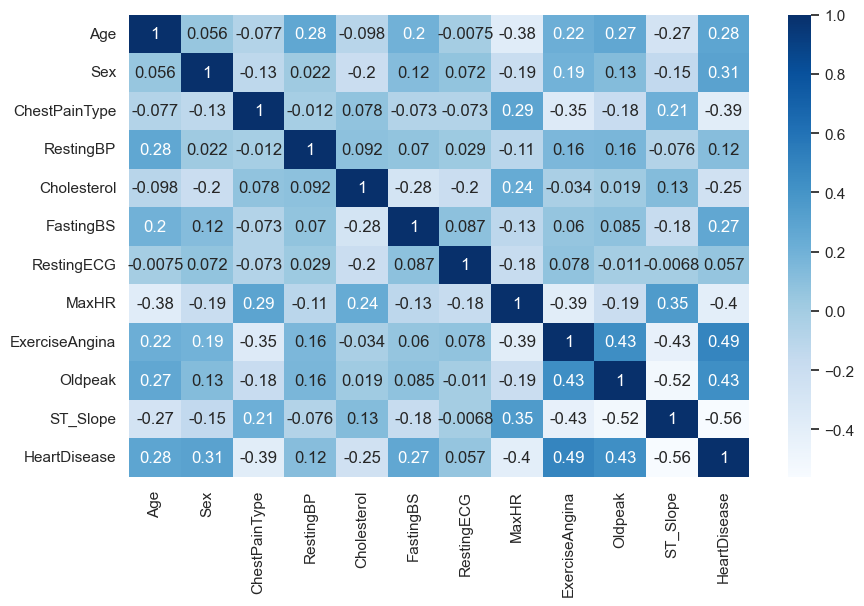

In [72]:
corr_matrix = dataset1.corr()
def absolute(x):
    return np.abs(x)
plt.figure(figsize = (10, 6))
sns.heatmap(corr_matrix, annot = True, cmap = 'Blues')
plt.show()

In [73]:
import seaborn as sns
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.feature_selection import f_classif

In [74]:
X = dataset1.drop('HeartDisease', axis=1)
y= dataset1['HeartDisease']
best_features = SelectKBest(score_func=f_classif, k='all')
fit = best_features.fit(X, y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns)
feature_scores = pd.concat([df_columns,df_scores],axis=1)
feature_scores.columns = ['features','scores']
feature_scores

,features,scores
0,Age,79.160779
1,Sex,94.253184
2,ChestPainType,161.185346
3,RestingBP,12.428747
4,Cholesterol,59.917129
5,FastingBS,70.478543
6,RestingECG,3.026321
7,MaxHR,178.397057
8,ExerciseAngina,296.144771
9,Oldpeak,211.110884


`RestingECG` and `RestingBP` has the least importance towards the target data `HeartDisease`. While `ST_Slope` and `ExerciseAngina` has the highest importance towards the target data.

<a name="Modelling"></a>
## <p style="padding: 8px;color:white; display:fill;background-color:#0077be; border-radius:5px; font-size:100%"> <b>7. Model Building</b>

### Data splitting

In [75]:
from sklearn.model_selection import train_test_split #To split data
from sklearn.preprocessing import StandardScaler #For Scaling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, f1_score, classification_report, confusion_matrix #For evaluating built models
from sklearn.model_selection import cross_val_score

In [76]:
y = dataset1['HeartDisease']
X = dataset1.drop(columns = ['HeartDisease'])

In [77]:
X.shape

(918, 11)

## Normalize

In [78]:
data = StandardScaler().fit_transform(X)

In [79]:
y.shape

(918,)

In [80]:
# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    data, y, test_size=0.3, random_state=42
)

X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.1, random_state=0)

In [81]:
y_test

795    0
312    1
544    0
292    0
344    1
803    0
557    1
862    0
96     0
398    1
299    1
829    0
529    1
538    1
254    1
231    0
907    1
684    1
594    1
165    1
422    1
572    1
300    1
911    1
768    0
54     0
332    0
294    1
Name: HeartDisease, dtype: int64

In [88]:
# Build and train the ANN model with the resampled data
ann_model = Sequential()
ann_model.add(Dense(units=128, activation='relu', input_dim=X_train.shape[1]))
ann_model.add(Dropout(0.5))
ann_model.add(Dense(units=64, activation='relu'))
ann_model.add(Dropout(0.3))
ann_model.add(Dense(units=32, activation='relu'))
ann_model.add(Dense(units=1, activation='sigmoid'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = ann_model.fit(X_train, y_train,
                        validation_data=(X_val, y_val),
                        batch_size=32, epochs=100)


Epoch 1/100
21/21 [==============================] - 2s 21ms/step - loss: 0.6138 - accuracy: 0.7118 - val_loss: 0.4868 - val_accuracy: 0.8508
Epoch 2/100
21/21 [==============================] - 0s 6ms/step - loss: 0.4830 - accuracy: 0.7960 - val_loss: 0.3841 - val_accuracy: 0.8629
Epoch 3/100
21/21 [==============================] - 0s 6ms/step - loss: 0.4371 - accuracy: 0.8006 - val_loss: 0.3449 - val_accuracy: 0.8548
Epoch 4/100
21/21 [==============================] - 0s 6ms/step - loss: 0.4029 - accuracy: 0.8396 - val_loss: 0.3179 - val_accuracy: 0.8750
Epoch 5/100
21/21 [==============================] - 0s 7ms/step - loss: 0.4136 - accuracy: 0.8318 - val_loss: 0.3259 - val_accuracy: 0.8790
Epoch 6/100
21/21 [==============================] - 0s 6ms/step - loss: 0.3899 - accuracy: 0.8302 - val_loss: 0.3054 - val_accuracy: 0.8831
Epoch 7/100
21/21 [==============================] - 0s 7ms/step - loss: 0.3737 - accuracy: 0.8583 - val_loss: 0.3128 - val_accuracy: 0.8790
Epoch 8/100


### Evaluate the model on test data

In [89]:
# Evaluate the model on test data
test_loss, test_accuracy = ann_model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

1/1 [==============================] - 0s 48ms/step - loss: 0.4941 - accuracy: 0.8571
Test Loss: 0.49405914545059204
Test Accuracy: 0.8571428656578064


In [90]:
# Evaluate the model using appropriate metrics
y_pred = ann_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
accuracy = accuracy_score(y_test, y_pred_classes)
f1 = f1_score(y_test, y_pred_classes, average='weighted')
print("Accuracy:", accuracy)
print("F1 Score:", f1)

1/1 [==============================] - 0s 138ms/step
Accuracy: 0.39285714285714285
F1 Score: 0.22161172161172163


### Plotting the Graphs for accuracy and loss

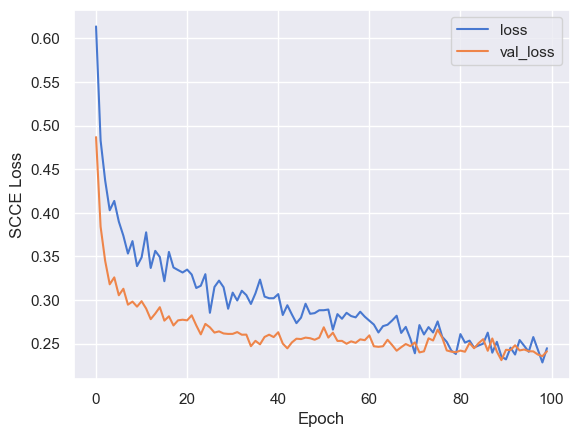

In [91]:
# Graph for the loss.
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('SCCE Loss')
plt.legend()
plt.grid(True)
plt.show()


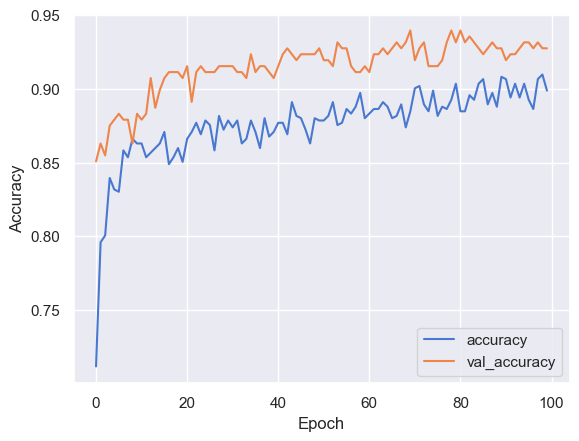

In [92]:
# Accuracy graph
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()